In [6]:
pip install yfinance

  Using cached yfinance-0.2.63-py2.py3-none-any.whl.metadata (5.8 kB)
  Using cached multitasking-0.0.11-py3-none-any.whl.metadata (5.5 kB)
  Using cached peewee-3.18.1.tar.gz (3.0 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached curl_cffi-0.11.4-cp39-abi3-win_amd64.whl.metadata (14 kB)
Using cached yfinance-0.2.63-py2.py3-none-any.whl (118 kB)
Using cached curl_cffi-0.11.4-cp39-abi3-win_amd64.whl (1.6 MB)
Using cached multitasking-0.0.11-py3-none-any.whl (8.5 kB)
  Created wheel for peewee: filename=peewee-3.18.1-py3-none-any.whl size=139097 sha256=5b5dc660138b7824ef57966b50e873452c8ae27daea83bb60c15b0002dc5d611
  Stored in directory: c:\users\shaban hassan\appdata\local\pip\cache\wheels\1a

In [8]:
# 1. Import Required Libraries
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

C:\Users\Shaban Hassan\AppData\Local\Temp\ipykernel_26740\2407548989.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start='2020-01-01', end='2023-01-01')
[*********************100%***********************]  1 of 1 completed


Root Mean Squared Error (RMSE): $3.37
R-squared (R²) Score: 0.8967


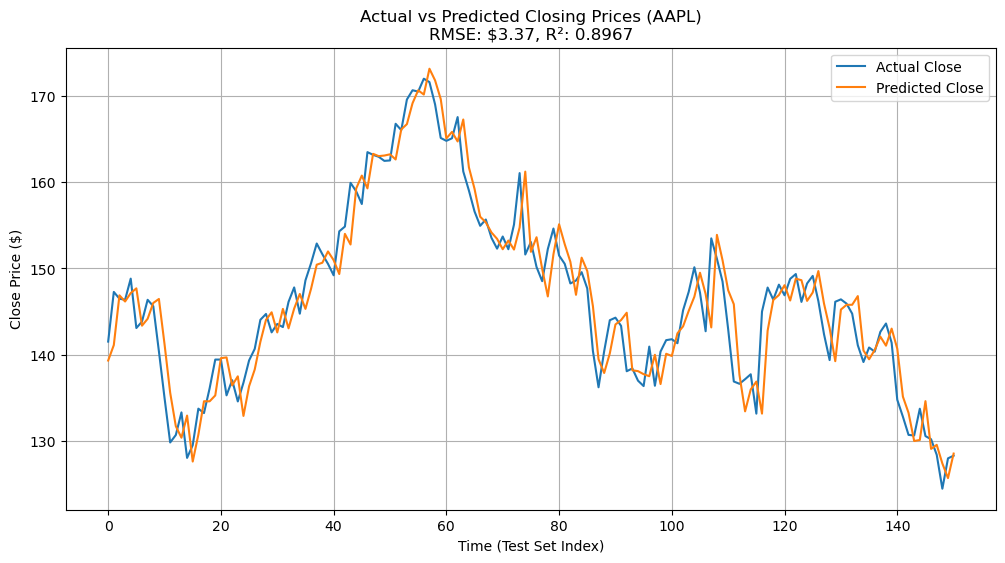

In [11]:
# 2. Fetch Historical Data for Apple (AAPL)
# Download historical stock data for Apple using yfinance.
ticker = 'AAPL'
data = yf.download(ticker, start='2020-01-01', end='2023-01-01')

# 3. Prepare Features and Target
# Create features (Open, High, Low, Volume) and the target (next day's Close price).
data['Next_Close'] = data['Close'].shift(-1)
data = data.dropna()
features = data[['Open', 'High', 'Low', 'Volume']]
target = data['Next_Close']

# 4. Split Data into Train and Test Sets
# Split the data into training and testing sets for model evaluation.
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# 5. Train Linear Regression Model
# Fit a linear regression model to the training data.
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Predict on Test Set
# Use the trained model to predict the closing prices for the test set.
predictions = model.predict(X_test)

# 7. Calculate and Display Metrics
# Calculate RMSE and R-squared to evaluate model performance.
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)
print(f'Root Mean Squared Error (RMSE): ${rmse:.2f}')
print(f'R-squared (R²) Score: {r2:.4f}')

# 8. Plot Actual vs Predicted Closing Prices
# Visualize the actual and predicted closing prices for the test set.
plt.figure(figsize=(12,6))
plt.plot(y_test.values, label='Actual Close')
plt.plot(predictions, label='Predicted Close')
plt.title(f'Actual vs Predicted Closing Prices ({ticker})\nRMSE: ${rmse:.2f}, R²: {r2:.4f}')
plt.xlabel('Time (Test Set Index)')
plt.ylabel('Close Price ($)')
plt.legend()
plt.grid(True)
plt.show()